In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("casting_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'casting_data'.
There are 2 directories and 0 images in 'casting_data\test'.
There are 0 directories and 453 images in 'casting_data\test\def_front'.
There are 0 directories and 262 images in 'casting_data\test\ok_front'.
There are 2 directories and 0 images in 'casting_data\train'.
There are 0 directories and 3758 images in 'casting_data\train\def_front'.
There are 0 directories and 2875 images in 'casting_data\train\ok_front'.


In [3]:
train_dir = "casting_data/train/"
test_dir = "casting_data/test/"

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(target_dir + random_image[0])
    return img

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['def_front' 'ok_front']


### PLOTTING RANDOM IMAGES

casting_data/train/cast_def_0_8417.jpeg


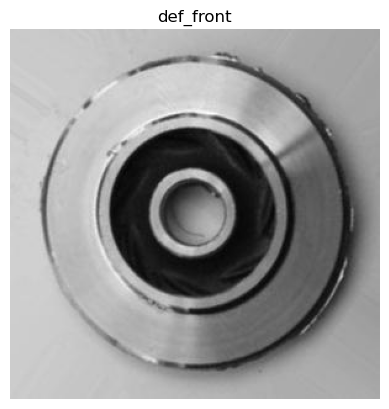

In [6]:
img = view_random_image(train_dir,class_names[0])

casting_data/train/cast_ok_0_3083.jpeg


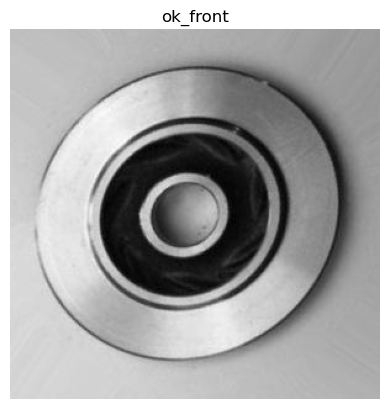

In [7]:
img = view_random_image(train_dir,class_names[1])

In [8]:
img.shape

(300, 300, 3)

casting_data/train/cast_def_0_9510.jpeg


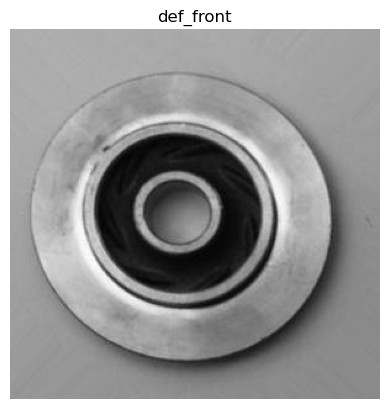

In [9]:
img = view_random_image(train_dir,class_names[0])

casting_data/test/cast_def_0_193.jpeg


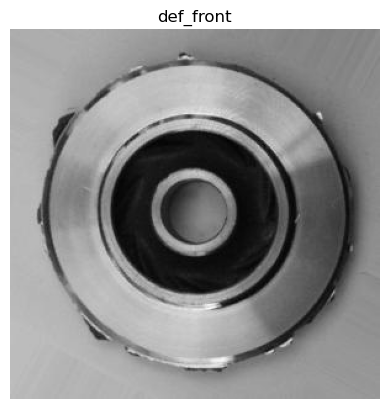

In [10]:
img = view_random_image(test_dir,class_names[0])

casting_data/test/cast_ok_0_1381.jpeg


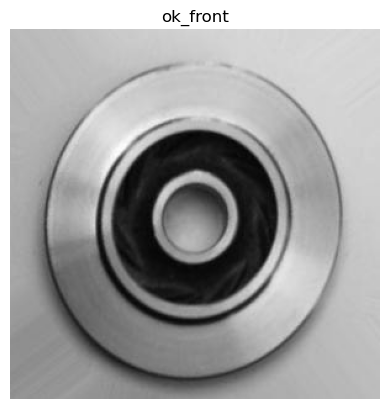

In [11]:
img = view_random_image(test_dir,class_names[1])

### Preprocessing the data

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [13]:
train_data_2 = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(300,300),class_mode="binary",seed=42)
valid_data_2 = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(300,300),class_mode="binary",seed=42)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [14]:
classnames = class_names
classnames,class_names

(array(['def_front', 'ok_front'], dtype='<U9'),
 array(['def_front', 'ok_front'], dtype='<U9'))

In [15]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, 
                                            save_best_only=True)

## MODEL BUILDING

### MODEL 1

In [16]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
208/208 [==============================] - 182s 846ms/step - loss: 0.5044 - accuracy: 0.7325 - val_loss: 0.4333 - val_accuracy: 0.7804
Epoch 2/5
208/208 [==============================] - 165s 791ms/step - loss: 0.2500 - accuracy: 0.8978 - val_loss: 0.1560 - val_accuracy: 0.9552
Epoch 3/5
208/208 [==============================] - 173s 832ms/step - loss: 0.1729 - accuracy: 0.9392 - val_loss: 0.1322 - val_accuracy: 0.9441
Epoch 4/5
208/208 [==============================] - 174s 835ms/step - loss: 0.1122 - accuracy: 0.9637 - val_loss: 0.0597 - val_accuracy: 0.9832
Epoch 5/5
208/208 [==============================] - 176s 845ms/step - loss: 0.0787 - accuracy: 0.9783 - val_loss: 0.0535 - val_accuracy: 0.9790


In [17]:
model_1.evaluate(valid_data)

23/23 [==============================] - 3s 134ms/step - loss: 0.0535 - accuracy: 0.9790


[0.053526803851127625, 0.9790209531784058]

<Axes: >

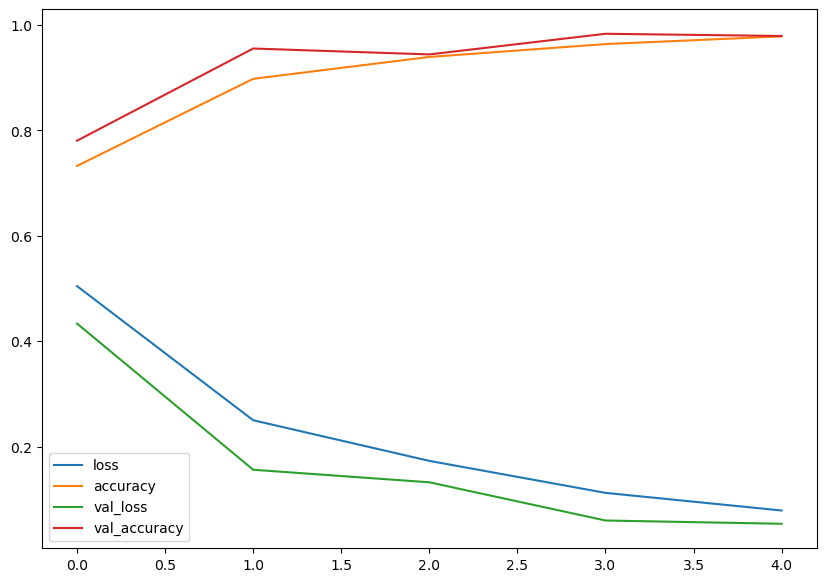

In [18]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

### MODEL 2 
Same as model 1 with different data preprocessing

In [54]:
model_2 = tf.keras.models.Sequential([  
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(300,300,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name = "model_2")

model_2.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_2 = model_2.fit(train_data_2,epochs=5,steps_per_epoch=len(train_data_2),validation_data=valid_data_2,validation_steps=len(valid_data_2),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/5
208/208 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0.7375INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 316s 2s/step - loss: 0.5163 - accuracy: 0.7375 - val_loss: 0.3243 - val_accuracy: 0.8629
Epoch 2/5
208/208 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.8810INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 301s 1s/step - loss: 0.2793 - accuracy: 0.8810 - val_loss: 0.1750 - val_accuracy: 0.9441
Epoch 3/5
208/208 [==============================] - ETA: 0s - loss: 0.1616 - accuracy: 0.9420INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 304s 1s/step - loss: 0.1616 - accuracy: 0.9420 - val_loss: 0.0834 - val_accuracy: 0.9720
Epoch 4/5
208/208 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9741INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 301s 1s/step - loss: 0.0904 - accuracy: 0.9741 - val_loss: 0.0653 - val_accuracy: 0.9748
Epoch 5/5
208/208 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9763INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 300s 1s/step - loss: 0.0715 - accuracy: 0.9763 - val_loss: 0.0559 - val_accuracy: 0.9804


In [56]:
model_2.evaluate(valid_data_2)

23/23 [==============================] - 6s 261ms/step - loss: 0.0559 - accuracy: 0.9804


[0.05594523623585701, 0.9804195761680603]

<Axes: >

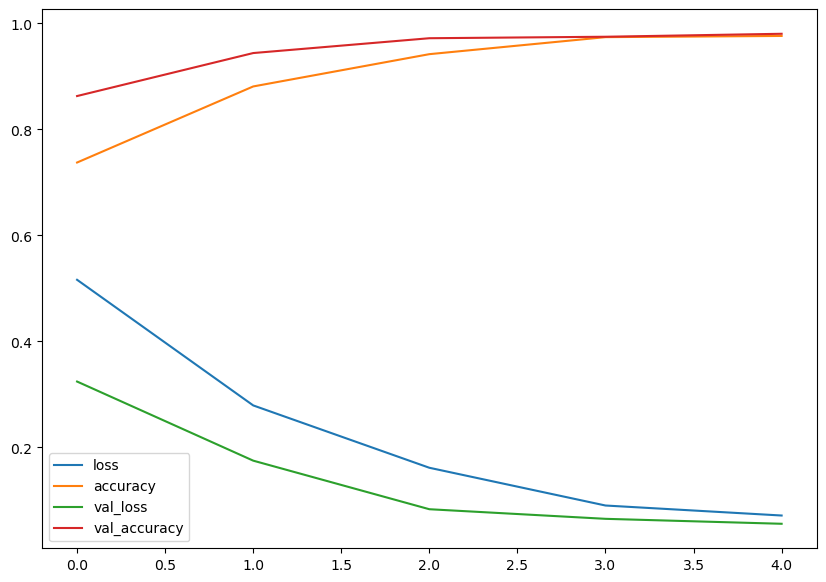

In [57]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [59]:
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(valid_data_2)

23/23 [==============================] - 6s 258ms/step - loss: 0.0559 - accuracy: 0.9804


[0.05594522878527641, 0.9804195761680603]

### MODEL 3
modified model 1

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(20, 3, activation='relu'),
  Conv2D(25, 3, activation='relu'),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(25, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid') 
], name="model_3")

# Compile the model
model_3.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
           callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/15
208/208 [==============================] - ETA: 0s - loss: 0.5210 - accuracy: 0.7357INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 130s 621ms/step - loss: 0.5210 - accuracy: 0.7357 - val_loss: 0.2933 - val_accuracy: 0.8699
Epoch 2/15
208/208 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9094INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 129s 621ms/step - loss: 0.2256 - accuracy: 0.9094 - val_loss: 0.1417 - val_accuracy: 0.9524
Epoch 3/15
208/208 [==============================] - 144s 693ms/step - loss: 0.1190 - accuracy: 0.9638 - val_loss: 0.1912 - val_accuracy: 0.9077
Epoch 4/15
208/208 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.9685INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 134s 646ms/step - loss: 0.0991 - accuracy: 0.9685 - val_loss: 0.0615 - val_accuracy: 0.9790
Epoch 5/15
208/208 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9834INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 135s 647ms/step - loss: 0.0594 - accuracy: 0.9834 - val_loss: 0.0487 - val_accuracy: 0.9888
Epoch 6/15
208/208 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9866INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 615ms/step - loss: 0.0465 - accuracy: 0.9866 - val_loss: 0.0451 - val_accuracy: 0.9902
Epoch 7/15
208/208 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9863INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 613ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0373 - val_accuracy: 0.9916
Epoch 8/15
208/208 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9870INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 615ms/step - loss: 0.0398 - accuracy: 0.9870 - val_loss: 0.0339 - val_accuracy: 0.9860
Epoch 9/15
208/208 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9914INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 613ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0247 - val_accuracy: 0.9888
Epoch 10/15
208/208 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9931INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 130s 624ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0218 - val_accuracy: 0.9930
Epoch 11/15
208/208 [==============================] - 128s 614ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0855 - val_accuracy: 0.9720
Epoch 12/15
208/208 [==============================] - 128s 615ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 13/15
208/208 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9919INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 133s 638ms/step - loss: 0.0214 - accuracy: 0.9919 - val_loss: 0.0203 - val_accuracy: 0.9958
Epoch 14/15
208/208 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9968INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 132s 636ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0140 - val_accuracy: 0.9958
Epoch 15/15
208/208 [==============================] - 173s 833ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0230 - val_accuracy: 0.9930


In [62]:
model_3.evaluate(valid_data)

23/23 [==============================] - 3s 116ms/step - loss: 0.0230 - accuracy: 0.9930


[0.023031122982501984, 0.9930070042610168]

<Axes: >

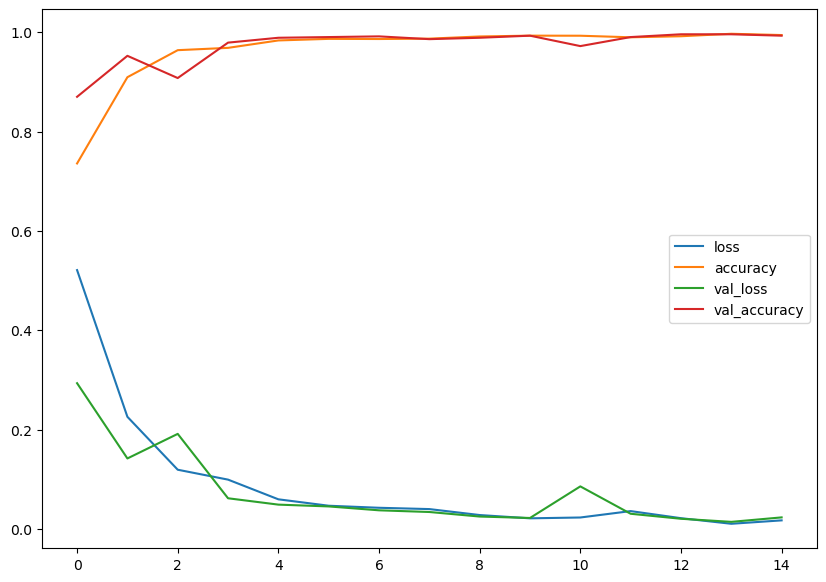

In [63]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [64]:
model_3 = tf.keras.models.load_model("model_experiments/model_3/")

In [66]:
model_3.evaluate(valid_data) 

23/23 [==============================] - 3s 116ms/step - loss: 0.0140 - accuracy: 0.9958


[0.014032898470759392, 0.9958041906356812]

In [68]:
#pd.crosstab(valid_data, model_3.predict(valid_data))

### MODEL 4

In [70]:
model_4 = Sequential([
  Conv2D(20, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(40, 3, activation='relu'),
  Conv2D(65, 3, activation='relu'),
  MaxPool2D(pool_size=3),
  Conv2D(15, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid') 
], name="model_4")

# Compile the model
model_4.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
           callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/5
208/208 [==============================] - ETA: 0s - loss: 0.5554 - accuracy: 0.6924INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 242s 1s/step - loss: 0.5554 - accuracy: 0.6924 - val_loss: 0.3386 - val_accuracy: 0.8503
Epoch 2/5
208/208 [==============================] - ETA: 0s - loss: 0.2506 - accuracy: 0.8936INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 245s 1s/step - loss: 0.2506 - accuracy: 0.8936 - val_loss: 0.2546 - val_accuracy: 0.9035
Epoch 3/5
208/208 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9510INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 225s 1s/step - loss: 0.1412 - accuracy: 0.9510 - val_loss: 0.1052 - val_accuracy: 0.9734
Epoch 4/5
208/208 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9766INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 226s 1s/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.0651 - val_accuracy: 0.9790
Epoch 5/5
208/208 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9825INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 250s 1s/step - loss: 0.0674 - accuracy: 0.9825 - val_loss: 0.0348 - val_accuracy: 0.9888


In [71]:
model_4.evaluate(valid_data)

23/23 [==============================] - 5s 200ms/step - loss: 0.0348 - accuracy: 0.9888


[0.0348038487136364, 0.988811194896698]

<Axes: >

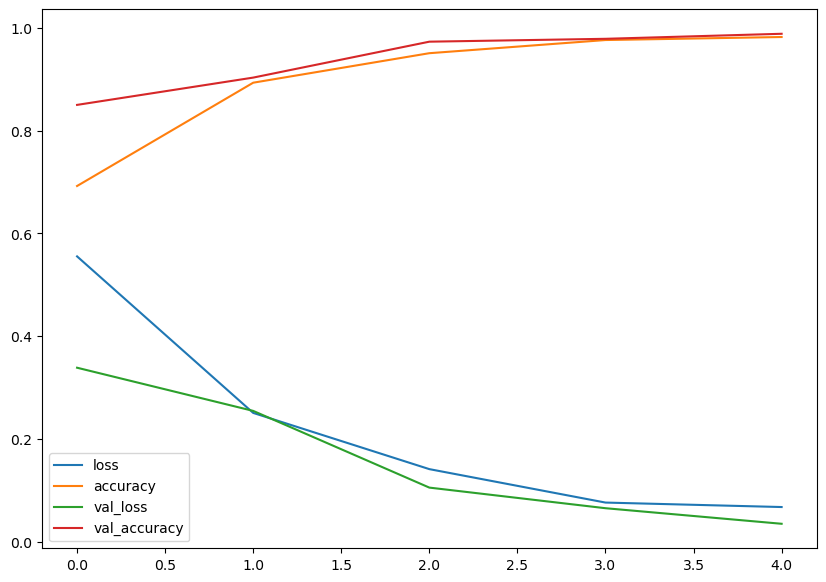

In [72]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [73]:
model_4 = tf.keras.models.load_model("model_experiments/model_4/")

In [74]:
model_4.evaluate(valid_data) 

23/23 [==============================] - 5s 197ms/step - loss: 0.0348 - accuracy: 0.9888


[0.0348038487136364, 0.988811194896698]

### MODEL 5
TRANSFER LEARNING USING VGG16 model

In [121]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

vgg = VGG16(include_top = False,input_shape = (224,224,3))

In [122]:
for layer in vgg.layers:
    print(layer)

In [123]:
for layer in vgg.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [124]:
i=0
for layer in vgg.layers:
    if i<=14:
        layer.trainable=False
    i+=1

In [125]:
for layer in vgg.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [126]:
x= Flatten()(vgg.output)
output = Dense(1, activation ='softmax')(x)
model_5 = Model(vgg.input,output)
model_5_name = "model_5"

In [128]:
model_5.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])


history_5 = model_5.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
           callbacks=[create_model_checkpoint(model_name=model_5_name)])

Epoch 1/2
208/208 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.4334INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


208/208 [==============================] - 829s 4s/step - loss: 0.6853 - accuracy: 0.4334 - val_loss: 0.6712 - val_accuracy: 0.3664
Epoch 2/2
208/208 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.4334INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


208/208 [==============================] - 809s 4s/step - loss: 0.6846 - accuracy: 0.4334 - val_loss: 0.6690 - val_accuracy: 0.3664


In [129]:
model_5.evaluate(valid_data)

23/23 [==============================] - 58s 3s/step - loss: 0.6690 - accuracy: 0.3664


[0.6689502000808716, 0.3664335608482361]

<Axes: >

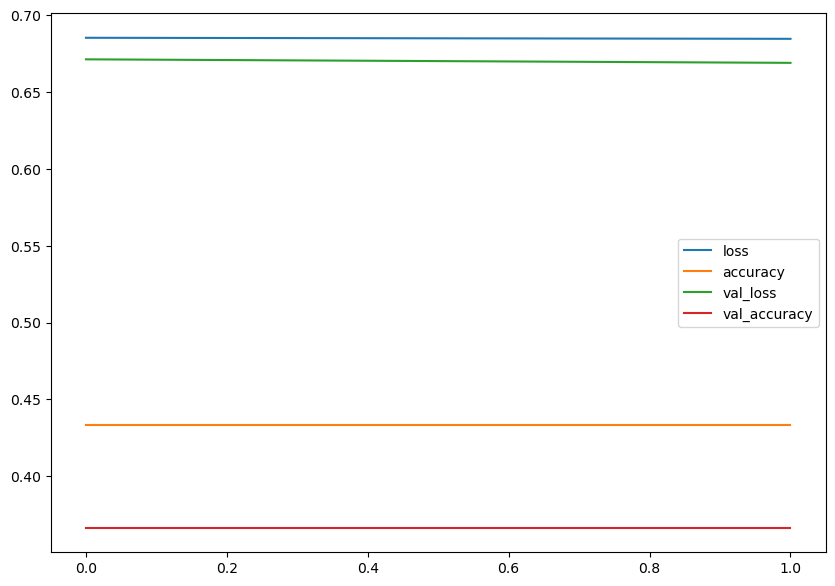

In [130]:
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [133]:
model_5 = tf.keras.models.load_model("model_experiments/model_5/")
model_5.evaluate(valid_data)[0]

23/23 [==============================] - 58s 3s/step - loss: 0.6690 - accuracy: 0.3664


0.6689502000808716

### Plotting accuracy for all 5 models

In [142]:
val = {"MODEL 1": model_1.evaluate(valid_data),
           "MODEL 2": model_2.evaluate(valid_data_2),
           "MODEL 3": model_3.evaluate(valid_data),
           "MODEL 4": model_4.evaluate(valid_data),
           "MODEL 5": model_5.evaluate(valid_data)}

23/23 [==============================] - 58s 2s/step - loss: 0.6690 - accuracy: 0.3664


In [154]:
vall = pd.DataFrame(val).T

In [155]:
vall.rename(columns = {0:'loss'}, inplace = True)
vall.rename(columns = {1:'accuracy'}, inplace = True)

In [156]:
vall

,loss,accuracy
MODEL 1,0.047740,0.980420
MODEL 2,0.055945,0.980420
MODEL 3,0.014033,0.995804
MODEL 4,0.034804,0.988811
MODEL 5,0.668950,0.366434


<Axes: >

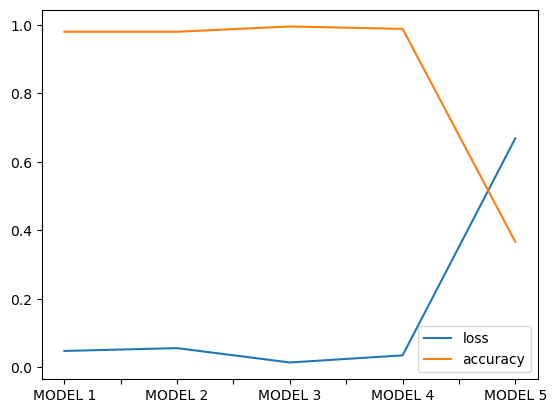

In [157]:
vall.plot()

## TESTING DATA

In [53]:
testing_dir = "casting_512x512/casting_512x512/"
testing_dir_2 = "casting_512x512/test/"
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(directory=testing_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
test_data_2 = test_datagen.flow_from_directory(directory=testing_dir_2,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# augmenting data
test_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             shear_range=0.2, 
                                             zoom_range=0.2, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
     

test_data_a = test_datagen_augmented.flow_from_directory(testing_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

Found 1040 images belonging to 2 classes.
Found 260 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


In [164]:
# test = {"MODEL 1": model_1.evaluate(test_data),
#            "MODEL 2": model_2.evaluate(test_data_2),
#            "MODEL 3": model_3.evaluate(test_data),
#            "MODEL 4": model_4.evaluate(test_data),
#            "MODEL 5": model_5.evaluate(test_data)}

41/41 [==============================] - 106s 3s/step - loss: 0.6765 - accuracy: 0.3992


## model 3 training on test data

In [175]:
model_3_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(20, 3, activation='relu'),
  Conv2D(25, 3, activation='relu'),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(25, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid') 
], name="model_3_1")

# Compile the model
model_3_1.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_3_1 = model_3_1.fit(test_data,
                        epochs=35,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_1.name)])

Epoch 1/35
33/33 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.6135INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 26s 769ms/step - loss: 0.6639 - accuracy: 0.6135 - val_loss: 0.6454 - val_accuracy: 0.7423
Epoch 2/35
33/33 [==============================] - ETA: 0s - loss: 0.5773 - accuracy: 0.7038INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 740ms/step - loss: 0.5773 - accuracy: 0.7038 - val_loss: 0.5644 - val_accuracy: 0.7115
Epoch 3/35
33/33 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7269INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 25s 761ms/step - loss: 0.5360 - accuracy: 0.7269 - val_loss: 0.5350 - val_accuracy: 0.7923
Epoch 4/35
33/33 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.7750INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 25s 751ms/step - loss: 0.4785 - accuracy: 0.7750 - val_loss: 0.4865 - val_accuracy: 0.7692
Epoch 5/35
33/33 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.7885INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 720ms/step - loss: 0.4399 - accuracy: 0.7885 - val_loss: 0.4337 - val_accuracy: 0.7885
Epoch 6/35
33/33 [==============================] - ETA: 0s - loss: 0.4048 - accuracy: 0.8192INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 25s 764ms/step - loss: 0.4048 - accuracy: 0.8192 - val_loss: 0.3951 - val_accuracy: 0.8231
Epoch 7/35
33/33 [==============================] - 22s 656ms/step - loss: 0.3764 - accuracy: 0.8317 - val_loss: 0.4019 - val_accuracy: 0.8192
Epoch 8/35
33/33 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.8519INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 711ms/step - loss: 0.3219 - accuracy: 0.8519 - val_loss: 0.3209 - val_accuracy: 0.8731
Epoch 9/35
33/33 [==============================] - ETA: 0s - loss: 0.2662 - accuracy: 0.8817INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 699ms/step - loss: 0.2662 - accuracy: 0.8817 - val_loss: 0.2778 - val_accuracy: 0.8846
Epoch 10/35
33/33 [==============================] - 22s 660ms/step - loss: 0.2821 - accuracy: 0.8769 - val_loss: 0.2893 - val_accuracy: 0.8769
Epoch 11/35
33/33 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.9106INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 719ms/step - loss: 0.1940 - accuracy: 0.9106 - val_loss: 0.2330 - val_accuracy: 0.9038
Epoch 12/35
33/33 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9452INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 706ms/step - loss: 0.1482 - accuracy: 0.9452 - val_loss: 0.2056 - val_accuracy: 0.9231
Epoch 13/35
33/33 [==============================] - 22s 656ms/step - loss: 0.1456 - accuracy: 0.9442 - val_loss: 0.2643 - val_accuracy: 0.8885
Epoch 14/35
33/33 [==============================] - 22s 652ms/step - loss: 0.1355 - accuracy: 0.9500 - val_loss: 0.2893 - val_accuracy: 0.8769
Epoch 15/35
33/33 [==============================] - 22s 663ms/step - loss: 0.0960 - accuracy: 0.9673 - val_loss: 0.4192 - val_accuracy: 0.8308
Epoch 16/35
33/33 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9702INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 723ms/step - loss: 0.0894 - accuracy: 0.9702 - val_loss: 0.1683 - val_accuracy: 0.9231
Epoch 17/35
33/33 [==============================] - 22s 663ms/step - loss: 0.0648 - accuracy: 0.9808 - val_loss: 0.1884 - val_accuracy: 0.9269
Epoch 18/35
33/33 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9798INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 704ms/step - loss: 0.0572 - accuracy: 0.9798 - val_loss: 0.1353 - val_accuracy: 0.9385
Epoch 19/35
33/33 [==============================] - 22s 665ms/step - loss: 0.0547 - accuracy: 0.9817 - val_loss: 0.1662 - val_accuracy: 0.9346
Epoch 20/35
33/33 [==============================] - 22s 667ms/step - loss: 0.0458 - accuracy: 0.9904 - val_loss: 0.1631 - val_accuracy: 0.9423
Epoch 21/35
33/33 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9885INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 697ms/step - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.1234 - val_accuracy: 0.9538
Epoch 22/35
33/33 [==============================] - 22s 660ms/step - loss: 0.0140 - accuracy: 0.9971 - val_loss: 0.1831 - val_accuracy: 0.9500
Epoch 23/35
33/33 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9962INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 705ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.1201 - val_accuracy: 0.9577
Epoch 24/35
33/33 [==============================] - 22s 651ms/step - loss: 0.0210 - accuracy: 0.9923 - val_loss: 0.1444 - val_accuracy: 0.9500
Epoch 25/35
33/33 [==============================] - 22s 662ms/step - loss: 0.0078 - accuracy: 0.9990 - val_loss: 0.1461 - val_accuracy: 0.9615
Epoch 26/35
33/33 [==============================] - 22s 648ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.1247 - val_accuracy: 0.9538
Epoch 27/35
33/33 [==============================] - 22s 666ms/step - loss: 0.0788 - accuracy: 0.9692 - val_loss: 0.5015 - val_accuracy: 0.8731
Epoch 28/35
33/33 [==============================] - 24s 736ms/step - loss: 0.1613 - accuracy: 0.9404 - val_loss: 0.3123 - val_accuracy: 0.8923
Epoch 29/35
33/33 [==============================] - 22s 670ms/step - loss: 0.0528 - accuracy: 0.9808 - val_loss: 0.2188 - val_accuracy: 0.9308
Epoc

In [176]:
model_3_1.evaluate(test_data_2)

9/9 [==============================] - 1s 150ms/step - loss: 0.1799 - accuracy: 0.9423


[0.17993085086345673, 0.942307710647583]

In [177]:
model_3_1 = tf.keras.models.load_model("model_experiments/model_3_1/")
model_3_1.evaluate(test_data_2)

9/9 [==============================] - 2s 144ms/step - loss: 0.1201 - accuracy: 0.9577


[0.12014881521463394, 0.9576923251152039]

<Axes: >

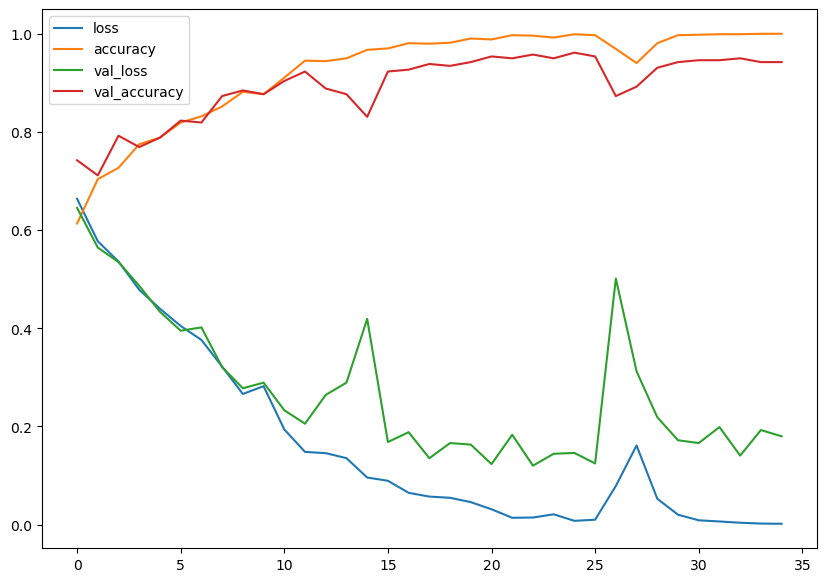

In [178]:
pd.DataFrame(history_3_1.history).plot(figsize=(10,7))

In [87]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    
    img=tf.image.decode_image(img)
    
    img=tf.image.resize(img,size=[img_shape,img_shape])
    
    img=img/255.
    return img

def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    
    pred = model.predict(tf.expand_dims(img,axis=0))
    
    pred_class = class_names[int(tf.round(pred))]
    
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}\n accuracy : {pred}")
    plt.axis(False)

1/1 [==============================] - 0s 285ms/step


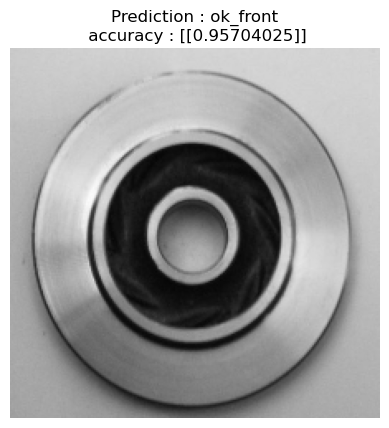

In [182]:
pred_and_plot(model_3_1,"cast_ok_0_9173.jpeg")

1/1 [==============================] - 0s 31ms/step


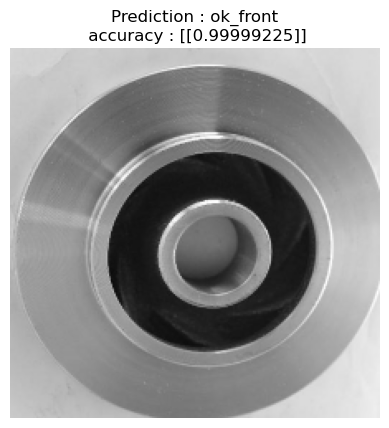

In [190]:
pred_and_plot(model_3_1,"cast_ok_0_8208.jpeg")

1/1 [==============================] - 0s 31ms/step


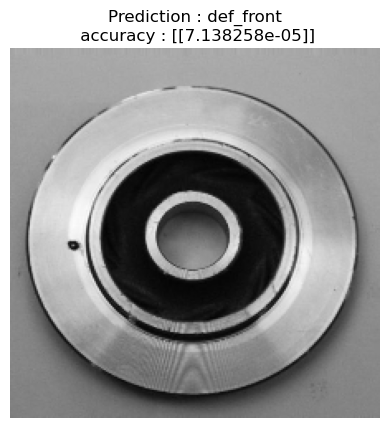

In [191]:
pred_and_plot(model_3_1,"cast_def_0_8844.jpeg")

1/1 [==============================] - 0s 38ms/step


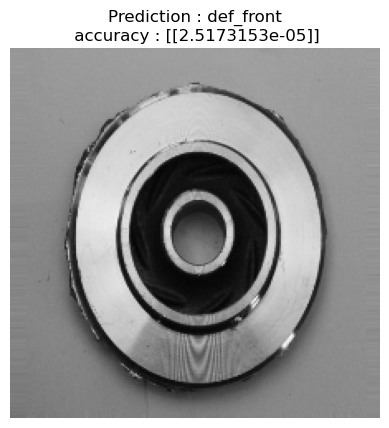

In [189]:
pred_and_plot(model_3_1,"cast_def_0_8220.jpeg")

1/1 [==============================] - 0s 135ms/step


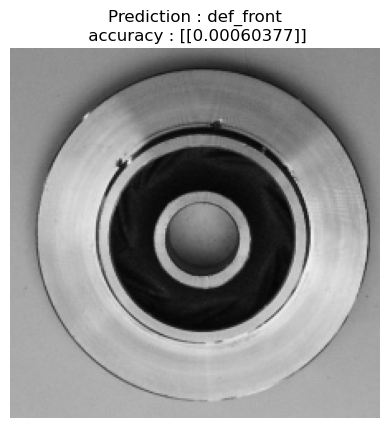

In [196]:
pred_and_plot(model_3_1,"cast_def_0_8045.jpeg")

1/1 [==============================] - 0s 20ms/step


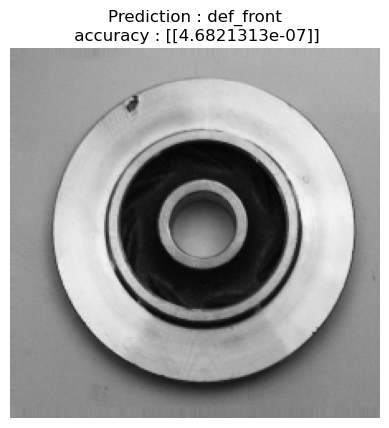

In [200]:
pred_and_plot(model_3_1,"cast_def_0_9687.jpeg")

1/1 [==============================] - 0s 37ms/step


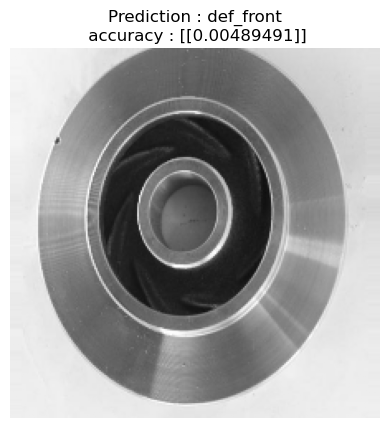

In [201]:
pred_and_plot(model_3_1,"cast_def_0_9737.jpeg")

1/1 [==============================] - 0s 16ms/step


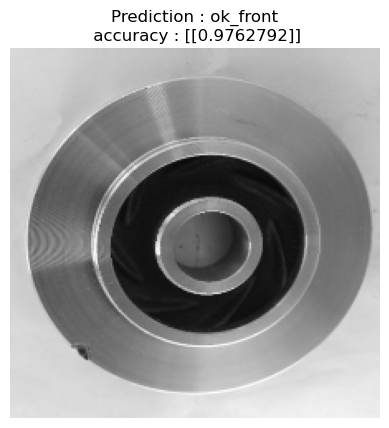

In [193]:
pred_and_plot(model_3_1,"cast_def_0_9854.jpeg")
# wrong prediction because not enough training pictures similar to this

### model 6

In [221]:
from tensorflow.keras import layers
model_6 = Sequential([
    layers.RandomFlip("horizontal_and_vertical",input_shape=(224,224,3), seed = 42 ),
    layers.RandomZoom(0.1, seed = 42 ),
    layers.RandomContrast(0.3, seed = seed  ),
  layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),


  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
], name="model_6")

# Compile the model
model_6.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_6 = model_6.fit(test_data,
                        epochs=20,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_6.name)])

NameError: name 'seed' is not defined

1/1 [==============================] - 0s 163ms/step


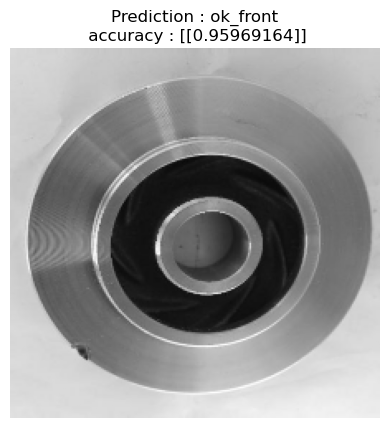

In [203]:
pred_and_plot(model_6,"cast_def_0_9854.jpeg")

In [204]:
model_6 = tf.keras.models.load_model("model_experiments/model_6/")
model_6.evaluate(test_data_2)

9/9 [==============================] - 4s 357ms/step - loss: 0.0743 - accuracy: 0.9769


[0.07425959408283234, 0.9769230484962463]

1/1 [==============================] - 0s 92ms/step


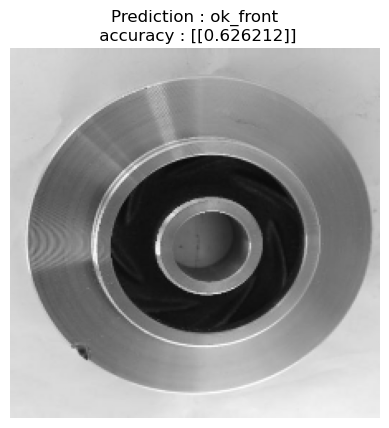

In [205]:
pred_and_plot(model_6,"cast_def_0_9854.jpeg")

<Axes: >

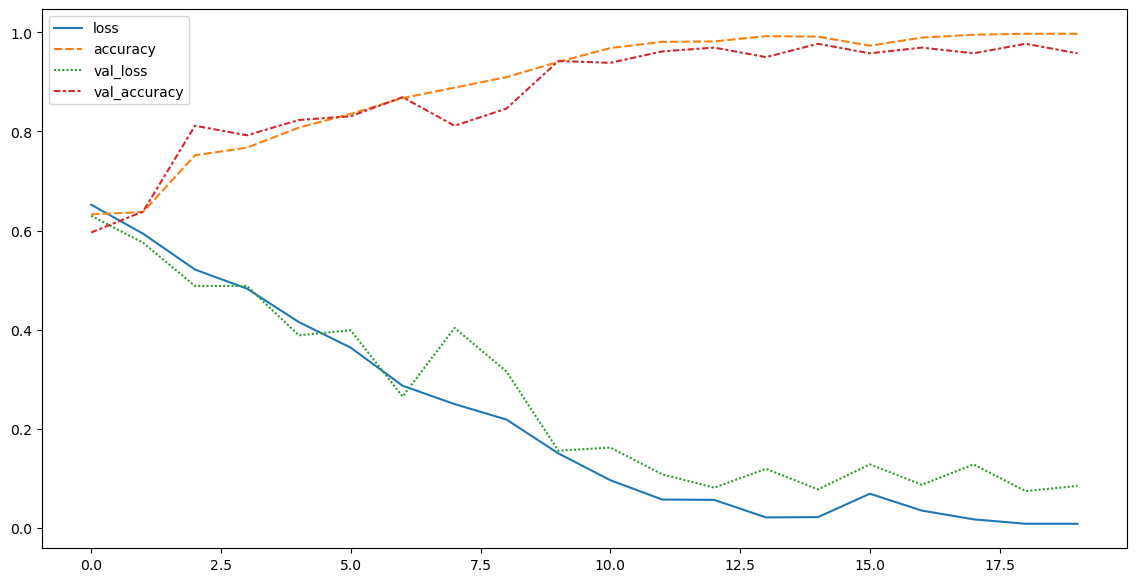

In [217]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.lineplot(pd.DataFrame(history_6.history))

## OTH

In [35]:
model_s = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    #tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_s")

model_s.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_s = model_s.fit(train_data,epochs=3,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),
                       callbacks=[create_model_checkpoint(model_name=model_s.name)])

Epoch 1/3
208/208 [==============================] - ETA: 0s - loss: 0.4965 - accuracy: 0.7544INFO:tensorflow:Assets written to: model_experiments\model_s\assets


INFO:tensorflow:Assets written to: model_experiments\model_s\assets


208/208 [==============================] - 88s 419ms/step - loss: 0.4965 - accuracy: 0.7544 - val_loss: 0.3412 - val_accuracy: 0.8531
Epoch 2/3
208/208 [==============================] - ETA: 0s - loss: 0.2809 - accuracy: 0.8890INFO:tensorflow:Assets written to: model_experiments\model_s\assets


INFO:tensorflow:Assets written to: model_experiments\model_s\assets


208/208 [==============================] - 85s 409ms/step - loss: 0.2809 - accuracy: 0.8890 - val_loss: 0.1629 - val_accuracy: 0.9678
Epoch 3/3
208/208 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9322INFO:tensorflow:Assets written to: model_experiments\model_s\assets


INFO:tensorflow:Assets written to: model_experiments\model_s\assets


208/208 [==============================] - 84s 404ms/step - loss: 0.1984 - accuracy: 0.9322 - val_loss: 0.1452 - val_accuracy: 0.9538


In [36]:
model_s.evaluate(valid_data)

23/23 [==============================] - 2s 92ms/step - loss: 0.1452 - accuracy: 0.9538


[0.14523887634277344, 0.9538461565971375]

In [37]:
model_s = tf.keras.models.load_model("model_experiments/model_s/")
model_s.evaluate(valid_data)

23/23 [==============================] - 2s 91ms/step - loss: 0.1452 - accuracy: 0.9538


[0.14523889124393463, 0.9538461565971375]

In [44]:
model_p = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_p")

model_p.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_p = model_p.fit(train_data,epochs=3,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),
                       callbacks=[create_model_checkpoint(model_name=model_p.name)])

Epoch 1/3
208/208 [==============================] - ETA: 0s - loss: 0.5315 - accuracy: 0.7122INFO:tensorflow:Assets written to: model_experiments\model_p\assets


INFO:tensorflow:Assets written to: model_experiments\model_p\assets


208/208 [==============================] - 95s 453ms/step - loss: 0.5315 - accuracy: 0.7122 - val_loss: 0.3900 - val_accuracy: 0.8252
Epoch 2/3
208/208 [==============================] - ETA: 0s - loss: 0.3107 - accuracy: 0.8682INFO:tensorflow:Assets written to: model_experiments\model_p\assets


INFO:tensorflow:Assets written to: model_experiments\model_p\assets


208/208 [==============================] - 95s 459ms/step - loss: 0.3107 - accuracy: 0.8682 - val_loss: 0.1643 - val_accuracy: 0.9441
Epoch 3/3
208/208 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.9379INFO:tensorflow:Assets written to: model_experiments\model_p\assets


INFO:tensorflow:Assets written to: model_experiments\model_p\assets


208/208 [==============================] - 96s 460ms/step - loss: 0.1681 - accuracy: 0.9379 - val_loss: 0.0786 - val_accuracy: 0.9762


In [45]:
model_p = tf.keras.models.load_model("model_experiments/model_p/")
model_p.evaluate(valid_data)

23/23 [==============================] - 2s 96ms/step - loss: 0.0786 - accuracy: 0.9762


[0.0786280632019043, 0.9762237668037415]

In [46]:
model_l = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_l")

model_l.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_l = model_l.fit(train_data,epochs=15,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),
                       callbacks=[create_model_checkpoint(model_name=model_l.name)])

Epoch 1/15
208/208 [==============================] - ETA: 0s - loss: 0.4825 - accuracy: 0.7494INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 104s 494ms/step - loss: 0.4825 - accuracy: 0.7494 - val_loss: 0.2892 - val_accuracy: 0.8853
Epoch 2/15
208/208 [==============================] - ETA: 0s - loss: 0.2381 - accuracy: 0.9058INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 97s 467ms/step - loss: 0.2381 - accuracy: 0.9058 - val_loss: 0.1121 - val_accuracy: 0.9636
Epoch 3/15
208/208 [==============================] - ETA: 0s - loss: 0.1365 - accuracy: 0.9527INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 96s 461ms/step - loss: 0.1365 - accuracy: 0.9527 - val_loss: 0.0621 - val_accuracy: 0.9790
Epoch 4/15
208/208 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9784INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 94s 453ms/step - loss: 0.0721 - accuracy: 0.9784 - val_loss: 0.0508 - val_accuracy: 0.9860
Epoch 5/15
208/208 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9855INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 94s 453ms/step - loss: 0.0508 - accuracy: 0.9855 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 6/15
208/208 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9879INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 101s 484ms/step - loss: 0.0417 - accuracy: 0.9879 - val_loss: 0.0315 - val_accuracy: 0.9930
Epoch 7/15
208/208 [==============================] - 98s 470ms/step - loss: 0.0291 - accuracy: 0.9920 - val_loss: 0.0406 - val_accuracy: 0.9902
Epoch 8/15
208/208 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9908INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 99s 477ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0313 - val_accuracy: 0.9916
Epoch 9/15
208/208 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9914INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 96s 460ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0281 - val_accuracy: 0.9930
Epoch 10/15
208/208 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9934INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 96s 462ms/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.0236 - val_accuracy: 0.9902
Epoch 11/15
208/208 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9962INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 95s 458ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0190 - val_accuracy: 0.9972
Epoch 12/15
208/208 [==============================] - 93s 446ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0384 - val_accuracy: 0.9860
Epoch 13/15
208/208 [==============================] - 94s 453ms/step - loss: 0.0202 - accuracy: 0.9941 - val_loss: 0.0467 - val_accuracy: 0.9832
Epoch 14/15
208/208 [==============================] - 93s 448ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0260 - val_accuracy: 0.9930
Epoch 15/15
208/208 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.9931INFO:tensorflow:Assets written to: model_experiments\model_l\assets


INFO:tensorflow:Assets written to: model_experiments\model_l\assets


208/208 [==============================] - 95s 454ms/step - loss: 0.0184 - accuracy: 0.9931 - val_loss: 0.0158 - val_accuracy: 0.9930


In [47]:
model_l = tf.keras.models.load_model("model_experiments/model_l/")
model_l.evaluate(valid_data)

23/23 [==============================] - 3s 104ms/step - loss: 0.0158 - accuracy: 0.9930


[0.015793997794389725, 0.9930070042610168]

In [48]:
model_q = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    #tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_q")

model_q.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_q = model_q.fit(train_data,epochs=15,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),
                       callbacks=[create_model_checkpoint(model_name=model_q.name)])

Epoch 1/15
208/208 [==============================] - ETA: 0s - loss: 0.5213 - accuracy: 0.7307INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 86s 411ms/step - loss: 0.5213 - accuracy: 0.7307 - val_loss: 0.4715 - val_accuracy: 0.7524
Epoch 2/15
208/208 [==============================] - ETA: 0s - loss: 0.3135 - accuracy: 0.8747INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 84s 404ms/step - loss: 0.3135 - accuracy: 0.8747 - val_loss: 0.1748 - val_accuracy: 0.9664
Epoch 3/15
208/208 [==============================] - ETA: 0s - loss: 0.1709 - accuracy: 0.9415INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 84s 406ms/step - loss: 0.1709 - accuracy: 0.9415 - val_loss: 0.1351 - val_accuracy: 0.9538
Epoch 4/15
208/208 [==============================] - ETA: 0s - loss: 0.1157 - accuracy: 0.9646INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 86s 412ms/step - loss: 0.1157 - accuracy: 0.9646 - val_loss: 0.0793 - val_accuracy: 0.9776
Epoch 5/15
208/208 [==============================] - 85s 407ms/step - loss: 0.1073 - accuracy: 0.9649 - val_loss: 0.0944 - val_accuracy: 0.9762
Epoch 6/15
208/208 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9824INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 85s 407ms/step - loss: 0.0650 - accuracy: 0.9824 - val_loss: 0.0593 - val_accuracy: 0.9804
Epoch 7/15
208/208 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9860INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 84s 406ms/step - loss: 0.0536 - accuracy: 0.9860 - val_loss: 0.0511 - val_accuracy: 0.9832
Epoch 8/15
208/208 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9900INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 85s 407ms/step - loss: 0.0413 - accuracy: 0.9900 - val_loss: 0.0420 - val_accuracy: 0.9832
Epoch 9/15
208/208 [==============================] - 84s 403ms/step - loss: 0.0350 - accuracy: 0.9926 - val_loss: 0.0511 - val_accuracy: 0.9804
Epoch 10/15
208/208 [==============================] - 82s 395ms/step - loss: 0.0299 - accuracy: 0.9929 - val_loss: 0.0576 - val_accuracy: 0.9860
Epoch 11/15
208/208 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9887INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 83s 400ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0356 - val_accuracy: 0.9860
Epoch 12/15
208/208 [==============================] - 82s 395ms/step - loss: 0.0223 - accuracy: 0.9947 - val_loss: 0.0567 - val_accuracy: 0.9832
Epoch 13/15
208/208 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9929INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 83s 401ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0274 - val_accuracy: 0.9916
Epoch 14/15
208/208 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9955INFO:tensorflow:Assets written to: model_experiments\model_q\assets


INFO:tensorflow:Assets written to: model_experiments\model_q\assets


208/208 [==============================] - 86s 412ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.0203 - val_accuracy: 0.9916
Epoch 15/15
208/208 [==============================] - 84s 403ms/step - loss: 0.0308 - accuracy: 0.9891 - val_loss: 0.0339 - val_accuracy: 0.9874


In [49]:
model_q = tf.keras.models.load_model("model_experiments/model_q/")
model_q.evaluate(valid_data)

23/23 [==============================] - 2s 93ms/step - loss: 0.0203 - accuracy: 0.9916


[0.020259279757738113, 0.9916083812713623]

## OTHER 2

In [51]:
model_l_r = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_l_r")

model_l_r.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_l_r = model_l_r.fit(test_data,epochs=15,steps_per_epoch=len(test_data),validation_data=test_data_2,validation_steps=len(test_data_2),
                       callbacks=[create_model_checkpoint(model_name=model_l_r.name)])

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.6260INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 32s 939ms/step - loss: 0.6472 - accuracy: 0.6260 - val_loss: 0.6008 - val_accuracy: 0.6577
Epoch 2/15
33/33 [==============================] - 17s 505ms/step - loss: 0.5673 - accuracy: 0.7067 - val_loss: 0.6406 - val_accuracy: 0.6231
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 0.5467 - accuracy: 0.7106INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 20s 593ms/step - loss: 0.5467 - accuracy: 0.7106 - val_loss: 0.5429 - val_accuracy: 0.7731
Epoch 4/15
33/33 [==============================] - ETA: 0s - loss: 0.4830 - accuracy: 0.7760INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 22s 675ms/step - loss: 0.4830 - accuracy: 0.7760 - val_loss: 0.4673 - val_accuracy: 0.7962
Epoch 5/15
33/33 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.7865INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 18s 540ms/step - loss: 0.4469 - accuracy: 0.7865 - val_loss: 0.4588 - val_accuracy: 0.7885
Epoch 6/15
33/33 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.8087INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 18s 550ms/step - loss: 0.3989 - accuracy: 0.8087 - val_loss: 0.4249 - val_accuracy: 0.8000
Epoch 7/15
33/33 [==============================] - ETA: 0s - loss: 0.3436 - accuracy: 0.8385INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 18s 540ms/step - loss: 0.3436 - accuracy: 0.8385 - val_loss: 0.3876 - val_accuracy: 0.8115
Epoch 8/15
33/33 [==============================] - ETA: 0s - loss: 0.2862 - accuracy: 0.8731INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 19s 565ms/step - loss: 0.2862 - accuracy: 0.8731 - val_loss: 0.3752 - val_accuracy: 0.8423
Epoch 9/15
33/33 [==============================] - ETA: 0s - loss: 0.2462 - accuracy: 0.9000INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 18s 555ms/step - loss: 0.2462 - accuracy: 0.9000 - val_loss: 0.3464 - val_accuracy: 0.8423
Epoch 10/15
33/33 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.9327INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 18s 554ms/step - loss: 0.1819 - accuracy: 0.9327 - val_loss: 0.2935 - val_accuracy: 0.8654
Epoch 11/15
33/33 [==============================] - 17s 516ms/step - loss: 0.2544 - accuracy: 0.8923 - val_loss: 0.3508 - val_accuracy: 0.8615
Epoch 12/15
33/33 [==============================] - 18s 552ms/step - loss: 0.1680 - accuracy: 0.9346 - val_loss: 0.3134 - val_accuracy: 0.8577
Epoch 13/15
33/33 [==============================] - ETA: 0s - loss: 0.1107 - accuracy: 0.9673INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 22s 655ms/step - loss: 0.1107 - accuracy: 0.9673 - val_loss: 0.2752 - val_accuracy: 0.8962
Epoch 14/15
33/33 [==============================] - ETA: 0s - loss: 0.0884 - accuracy: 0.9712INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r\assets


33/33 [==============================] - 18s 553ms/step - loss: 0.0884 - accuracy: 0.9712 - val_loss: 0.2670 - val_accuracy: 0.9038
Epoch 15/15
33/33 [==============================] - 16s 495ms/step - loss: 0.0673 - accuracy: 0.9788 - val_loss: 0.2983 - val_accuracy: 0.9000


In [52]:
model_l_r = tf.keras.models.load_model("model_experiments/model_l_r/")
model_l_r.evaluate(valid_data)

23/23 [==============================] - 3s 102ms/step - loss: 0.6703 - accuracy: 0.7413


[0.6703067421913147, 0.7412587404251099]

In [58]:
model_l_r_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_l_r_2")

model_l_r_2.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_l_r_2 = model_l_r_2.fit(test_data_a,epochs=15,steps_per_epoch=len(test_data_a),validation_data=test_data_2,validation_steps=len(test_data_2),
                       callbacks=[create_model_checkpoint(model_name=model_l_r_2.name)])

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 1.1471 - accuracy: 0.6327INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


33/33 [==============================] - 24s 682ms/step - loss: 1.1471 - accuracy: 0.6327 - val_loss: 0.7065 - val_accuracy: 0.4038
Epoch 2/15
33/33 [==============================] - ETA: 0s - loss: 0.7072 - accuracy: 0.3760INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


33/33 [==============================] - 23s 681ms/step - loss: 0.7072 - accuracy: 0.3760 - val_loss: 0.6932 - val_accuracy: 0.4923
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5913INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


33/33 [==============================] - 23s 678ms/step - loss: 0.6932 - accuracy: 0.5913 - val_loss: 0.6924 - val_accuracy: 0.5962
Epoch 4/15
33/33 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.6019INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


33/33 [==============================] - 23s 695ms/step - loss: 0.6917 - accuracy: 0.6019 - val_loss: 0.6898 - val_accuracy: 0.5962
Epoch 5/15
33/33 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.6019INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


33/33 [==============================] - 23s 680ms/step - loss: 0.6866 - accuracy: 0.6019 - val_loss: 0.6708 - val_accuracy: 0.5962
Epoch 6/15
33/33 [==============================] - 21s 637ms/step - loss: 0.6881 - accuracy: 0.6019 - val_loss: 0.6712 - val_accuracy: 0.5962
Epoch 7/15
33/33 [==============================] - ETA: 0s - loss: 0.6769 - accuracy: 0.6019INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


33/33 [==============================] - 23s 684ms/step - loss: 0.6769 - accuracy: 0.6019 - val_loss: 0.6637 - val_accuracy: 0.5962
Epoch 8/15
33/33 [==============================] - 20s 610ms/step - loss: 0.7707 - accuracy: 0.6058 - val_loss: 0.7634 - val_accuracy: 0.4038
Epoch 9/15
33/33 [==============================] - 20s 605ms/step - loss: 0.6838 - accuracy: 0.5712 - val_loss: 0.6753 - val_accuracy: 0.5962
Epoch 10/15
33/33 [==============================] - 21s 620ms/step - loss: 0.6790 - accuracy: 0.6010 - val_loss: 0.6704 - val_accuracy: 0.5962
Epoch 11/15
33/33 [==============================] - 21s 621ms/step - loss: 0.6836 - accuracy: 0.6019 - val_loss: 0.6674 - val_accuracy: 0.5962
Epoch 12/15
33/33 [==============================] - 20s 600ms/step - loss: 0.6801 - accuracy: 0.6029 - val_loss: 0.6699 - val_accuracy: 0.5962
Epoch 13/15
33/33 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.6019INFO:tensorflow:Assets written to: model_experiments\mod

INFO:tensorflow:Assets written to: model_experiments\model_l_r_2\assets


33/33 [==============================] - 22s 668ms/step - loss: 0.6667 - accuracy: 0.6019 - val_loss: 0.6603 - val_accuracy: 0.5962
Epoch 14/15
33/33 [==============================] - 20s 606ms/step - loss: 0.7158 - accuracy: 0.6019 - val_loss: 0.6671 - val_accuracy: 0.5962
Epoch 15/15
33/33 [==============================] - 21s 634ms/step - loss: 0.6806 - accuracy: 0.5990 - val_loss: 0.6748 - val_accuracy: 0.5962


In [59]:
model_l_r_2 = tf.keras.models.load_model("model_experiments/model_l_r_2/")
model_l_r_2.evaluate(valid_data)

23/23 [==============================] - 3s 109ms/step - loss: 0.6591 - accuracy: 0.6336


[0.6590908765792847, 0.6335664391517639]

In [67]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
])

model_l_r_3 = tf.keras.models.Sequential([
    data_augmentation,
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name="model_l_r_3")

model_l_r_3.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_l_r_3 = model_l_r_3.fit(test_data,epochs=5,steps_per_epoch=len(test_data),validation_data=test_data_2,validation_steps=len(test_data_2),
                       callbacks=[create_model_checkpoint(model_name=model_l_r_3.name)])

Epoch 1/5
33/33 [==============================] - ETA: 0s - loss: 0.6627 - accuracy: 0.5856INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


33/33 [==============================] - 23s 650ms/step - loss: 0.6627 - accuracy: 0.5856 - val_loss: 0.6268 - val_accuracy: 0.6000
Epoch 2/5
33/33 [==============================] - 18s 556ms/step - loss: 0.5762 - accuracy: 0.7058 - val_loss: 0.6303 - val_accuracy: 0.6500
Epoch 3/5
33/33 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.7125INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


33/33 [==============================] - 21s 631ms/step - loss: 0.5571 - accuracy: 0.7125 - val_loss: 0.5376 - val_accuracy: 0.7385
Epoch 4/5
33/33 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.7327INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


33/33 [==============================] - 20s 614ms/step - loss: 0.5441 - accuracy: 0.7327 - val_loss: 0.5160 - val_accuracy: 0.7846
Epoch 5/5
33/33 [==============================] - ETA: 0s - loss: 0.5044 - accuracy: 0.7538INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_l_r_3\assets


33/33 [==============================] - 21s 645ms/step - loss: 0.5044 - accuracy: 0.7538 - val_loss: 0.4698 - val_accuracy: 0.7923


In [61]:
model_l_r_3 = tf.keras.models.load_model("model_experiments/model_l_r_3/")
model_l_r_3.evaluate(valid_data)

23/23 [==============================] - 3s 107ms/step - loss: 0.3271 - accuracy: 0.8601


[0.32705217599868774, 0.8601398468017578]

In [66]:
model_3_2 = tf.keras.Sequential([
    layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(20, 3, activation='relu'),
    layers.Conv2D(25, 3, activation='relu'),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(25, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(2),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid') 
], name="model_3_2")

# Compile the model
model_3_2.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_3_2 = model_3_2.fit(test_data,
                        epochs=25,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_2.name)])

Epoch 1/25
33/33 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5952INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 26s 747ms/step - loss: 0.6834 - accuracy: 0.5952 - val_loss: 0.6537 - val_accuracy: 0.5962
Epoch 2/25
33/33 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.6442INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 730ms/step - loss: 0.5942 - accuracy: 0.6442 - val_loss: 0.5825 - val_accuracy: 0.6231
Epoch 3/25
33/33 [==============================] - ETA: 0s - loss: 0.5262 - accuracy: 0.7346INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 735ms/step - loss: 0.5262 - accuracy: 0.7346 - val_loss: 0.4932 - val_accuracy: 0.7962
Epoch 4/25
33/33 [==============================] - ETA: 0s - loss: 0.4756 - accuracy: 0.7625INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 727ms/step - loss: 0.4756 - accuracy: 0.7625 - val_loss: 0.4420 - val_accuracy: 0.8115
Epoch 5/25
33/33 [==============================] - 22s 675ms/step - loss: 0.4409 - accuracy: 0.7942 - val_loss: 0.4863 - val_accuracy: 0.7885
Epoch 6/25
33/33 [==============================] - ETA: 0s - loss: 0.4049 - accuracy: 0.8202INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 730ms/step - loss: 0.4049 - accuracy: 0.8202 - val_loss: 0.3753 - val_accuracy: 0.8077
Epoch 7/25
33/33 [==============================] - ETA: 0s - loss: 0.3253 - accuracy: 0.8663INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 723ms/step - loss: 0.3253 - accuracy: 0.8663 - val_loss: 0.3729 - val_accuracy: 0.8038
Epoch 8/25
33/33 [==============================] - ETA: 0s - loss: 0.2760 - accuracy: 0.8865INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 725ms/step - loss: 0.2760 - accuracy: 0.8865 - val_loss: 0.2971 - val_accuracy: 0.8731
Epoch 9/25
33/33 [==============================] - 22s 673ms/step - loss: 0.2461 - accuracy: 0.9125 - val_loss: 0.3065 - val_accuracy: 0.8423
Epoch 10/25
33/33 [==============================] - ETA: 0s - loss: 0.2159 - accuracy: 0.9192INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 716ms/step - loss: 0.2159 - accuracy: 0.9192 - val_loss: 0.2537 - val_accuracy: 0.8923
Epoch 11/25
33/33 [==============================] - 22s 667ms/step - loss: 0.1849 - accuracy: 0.9327 - val_loss: 0.3633 - val_accuracy: 0.8885
Epoch 12/25
33/33 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9423INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 734ms/step - loss: 0.1505 - accuracy: 0.9423 - val_loss: 0.2216 - val_accuracy: 0.9038
Epoch 13/25
33/33 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9644INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 25s 756ms/step - loss: 0.1037 - accuracy: 0.9644 - val_loss: 0.1827 - val_accuracy: 0.9269
Epoch 14/25
33/33 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.9740INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 26s 790ms/step - loss: 0.0855 - accuracy: 0.9740 - val_loss: 0.1530 - val_accuracy: 0.9462
Epoch 15/25
33/33 [==============================] - 24s 712ms/step - loss: 0.0645 - accuracy: 0.9837 - val_loss: 0.2363 - val_accuracy: 0.9192
Epoch 16/25
33/33 [==============================] - 43s 1s/step - loss: 0.0453 - accuracy: 0.9865 - val_loss: 0.1763 - val_accuracy: 0.9385
Epoch 17/25
33/33 [==============================] - 31s 916ms/step - loss: 0.0683 - accuracy: 0.9712 - val_loss: 0.2355 - val_accuracy: 0.9192
Epoch 18/25
33/33 [==============================] - ETA: 0s - loss: 0.0948 - accuracy: 0.9625INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 27s 827ms/step - loss: 0.0948 - accuracy: 0.9625 - val_loss: 0.1152 - val_accuracy: 0.9538
Epoch 19/25
33/33 [==============================] - 26s 794ms/step - loss: 0.0534 - accuracy: 0.9865 - val_loss: 0.1233 - val_accuracy: 0.9577
Epoch 20/25
33/33 [==============================] - 23s 683ms/step - loss: 0.0319 - accuracy: 0.9923 - val_loss: 0.2156 - val_accuracy: 0.9385
Epoch 21/25
33/33 [==============================] - 22s 664ms/step - loss: 0.0436 - accuracy: 0.9885 - val_loss: 0.1324 - val_accuracy: 0.9538
Epoch 22/25
33/33 [==============================] - 22s 669ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.1900 - val_accuracy: 0.9269
Epoch 23/25
33/33 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9962INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_2\assets


33/33 [==============================] - 24s 716ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.1082 - val_accuracy: 0.9731
Epoch 24/25
33/33 [==============================] - 22s 667ms/step - loss: 0.0357 - accuracy: 0.9875 - val_loss: 0.2184 - val_accuracy: 0.9346
Epoch 25/25
33/33 [==============================] - 22s 659ms/step - loss: 0.0309 - accuracy: 0.9875 - val_loss: 0.2245 - val_accuracy: 0.9423


In [68]:
model_3_3 = tf.keras.Sequential([
    data_augmentation,
    
    layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(20, 3, activation='relu'),
    layers.Conv2D(25, 3, activation='relu'),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(25, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(2),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid') 
], name="model_3_3")

# Compile the model
model_3_3.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_3_3 = model_3_3.fit(test_data,
                        epochs=25,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_3.name)])

Epoch 1/25
33/33 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.5981INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 31s 886ms/step - loss: 0.6651 - accuracy: 0.5981 - val_loss: 0.6564 - val_accuracy: 0.5962
Epoch 2/25
33/33 [==============================] - ETA: 0s - loss: 0.6102 - accuracy: 0.6558INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 29s 887ms/step - loss: 0.6102 - accuracy: 0.6558 - val_loss: 0.5717 - val_accuracy: 0.7269
Epoch 3/25
33/33 [==============================] - ETA: 0s - loss: 0.5655 - accuracy: 0.7163INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 29s 877ms/step - loss: 0.5655 - accuracy: 0.7163 - val_loss: 0.5538 - val_accuracy: 0.7192
Epoch 4/25
33/33 [==============================] - ETA: 0s - loss: 0.5346 - accuracy: 0.7423INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 28s 865ms/step - loss: 0.5346 - accuracy: 0.7423 - val_loss: 0.4959 - val_accuracy: 0.7538
Epoch 5/25
33/33 [==============================] - ETA: 0s - loss: 0.5047 - accuracy: 0.7490INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 28s 860ms/step - loss: 0.5047 - accuracy: 0.7490 - val_loss: 0.4365 - val_accuracy: 0.8115
Epoch 6/25
33/33 [==============================] - ETA: 0s - loss: 0.4521 - accuracy: 0.7779INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 821ms/step - loss: 0.4521 - accuracy: 0.7779 - val_loss: 0.3632 - val_accuracy: 0.8231
Epoch 7/25
33/33 [==============================] - ETA: 0s - loss: 0.4223 - accuracy: 0.7837INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 824ms/step - loss: 0.4223 - accuracy: 0.7837 - val_loss: 0.3548 - val_accuracy: 0.8346
Epoch 8/25
33/33 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8269INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 32s 978ms/step - loss: 0.3744 - accuracy: 0.8269 - val_loss: 0.3140 - val_accuracy: 0.8577
Epoch 9/25
33/33 [==============================] - 31s 928ms/step - loss: 0.3919 - accuracy: 0.8096 - val_loss: 0.3674 - val_accuracy: 0.8192
Epoch 10/25
33/33 [==============================] - ETA: 0s - loss: 0.3660 - accuracy: 0.8365INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 30s 907ms/step - loss: 0.3660 - accuracy: 0.8365 - val_loss: 0.2852 - val_accuracy: 0.8808
Epoch 11/25
33/33 [==============================] - ETA: 0s - loss: 0.3283 - accuracy: 0.8385INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 815ms/step - loss: 0.3283 - accuracy: 0.8385 - val_loss: 0.2583 - val_accuracy: 0.8885
Epoch 12/25
33/33 [==============================] - 24s 745ms/step - loss: 0.3190 - accuracy: 0.8462 - val_loss: 0.3096 - val_accuracy: 0.8654
Epoch 13/25
33/33 [==============================] - ETA: 0s - loss: 0.3186 - accuracy: 0.8452INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 833ms/step - loss: 0.3186 - accuracy: 0.8452 - val_loss: 0.2557 - val_accuracy: 0.9077
Epoch 14/25
33/33 [==============================] - 24s 728ms/step - loss: 0.3222 - accuracy: 0.8567 - val_loss: 0.2688 - val_accuracy: 0.8885
Epoch 15/25
33/33 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.8663INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 823ms/step - loss: 0.2964 - accuracy: 0.8663 - val_loss: 0.2280 - val_accuracy: 0.8962
Epoch 16/25
33/33 [==============================] - 24s 729ms/step - loss: 0.2978 - accuracy: 0.8721 - val_loss: 0.3216 - val_accuracy: 0.8385
Epoch 17/25
33/33 [==============================] - ETA: 0s - loss: 0.3159 - accuracy: 0.8663INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 830ms/step - loss: 0.3159 - accuracy: 0.8663 - val_loss: 0.2135 - val_accuracy: 0.9115
Epoch 18/25
33/33 [==============================] - 24s 739ms/step - loss: 0.2742 - accuracy: 0.8827 - val_loss: 0.3547 - val_accuracy: 0.8462
Epoch 19/25
33/33 [==============================] - ETA: 0s - loss: 0.3011 - accuracy: 0.8596INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 822ms/step - loss: 0.3011 - accuracy: 0.8596 - val_loss: 0.1943 - val_accuracy: 0.9423
Epoch 20/25
33/33 [==============================] - 25s 754ms/step - loss: 0.2541 - accuracy: 0.8837 - val_loss: 0.2274 - val_accuracy: 0.9038
Epoch 21/25
33/33 [==============================] - 25s 752ms/step - loss: 0.2326 - accuracy: 0.8990 - val_loss: 0.1950 - val_accuracy: 0.9154
Epoch 22/25
33/33 [==============================] - 26s 795ms/step - loss: 0.1919 - accuracy: 0.9260 - val_loss: 0.2068 - val_accuracy: 0.9154
Epoch 23/25
33/33 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9135INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 27s 831ms/step - loss: 0.2025 - accuracy: 0.9135 - val_loss: 0.1630 - val_accuracy: 0.9269
Epoch 24/25
33/33 [==============================] - 24s 740ms/step - loss: 0.1968 - accuracy: 0.9173 - val_loss: 0.1838 - val_accuracy: 0.9269
Epoch 25/25
33/33 [==============================] - ETA: 0s - loss: 0.1889 - accuracy: 0.9308INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_3\assets


33/33 [==============================] - 28s 840ms/step - loss: 0.1889 - accuracy: 0.9308 - val_loss: 0.1350 - val_accuracy: 0.9500


In [71]:
model_3_4 = tf.keras.Sequential([
    data_augmentation,
    
    layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(20, 3, activation='relu'),
    layers.Conv2D(25, 3, activation='relu'),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(25, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(2),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid') 
], name="model_3_4")

# Compile the model
model_3_4.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(lr=0.0008),
                metrics=["accuracy"])


history_3_4 = model_3_4.fit(test_data,
                        epochs=15,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_4.name)])

Epoch 1/15
33/33 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.6019INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 30s 846ms/step - loss: 0.6685 - accuracy: 0.6019 - val_loss: 0.6369 - val_accuracy: 0.5962
Epoch 2/15
33/33 [==============================] - ETA: 0s - loss: 0.6106 - accuracy: 0.6856INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 27s 835ms/step - loss: 0.6106 - accuracy: 0.6856 - val_loss: 0.5555 - val_accuracy: 0.7308
Epoch 3/15
33/33 [==============================] - ETA: 0s - loss: 0.5650 - accuracy: 0.7250INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 28s 834ms/step - loss: 0.5650 - accuracy: 0.7250 - val_loss: 0.5350 - val_accuracy: 0.7308
Epoch 4/15
33/33 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.7087INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 27s 821ms/step - loss: 0.5625 - accuracy: 0.7087 - val_loss: 0.5122 - val_accuracy: 0.7538
Epoch 5/15
33/33 [==============================] - 24s 732ms/step - loss: 0.5429 - accuracy: 0.7279 - val_loss: 0.5158 - val_accuracy: 0.7808
Epoch 6/15
33/33 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.7567INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 28s 835ms/step - loss: 0.5015 - accuracy: 0.7567 - val_loss: 0.4373 - val_accuracy: 0.7885
Epoch 7/15
33/33 [==============================] - ETA: 0s - loss: 0.4535 - accuracy: 0.7750INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 28s 837ms/step - loss: 0.4535 - accuracy: 0.7750 - val_loss: 0.3676 - val_accuracy: 0.8423
Epoch 8/15
33/33 [==============================] - ETA: 0s - loss: 0.3869 - accuracy: 0.8087INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 27s 828ms/step - loss: 0.3869 - accuracy: 0.8087 - val_loss: 0.3050 - val_accuracy: 0.8654
Epoch 9/15
33/33 [==============================] - 25s 745ms/step - loss: 0.3679 - accuracy: 0.8202 - val_loss: 0.3151 - val_accuracy: 0.8500
Epoch 10/15
33/33 [==============================] - ETA: 0s - loss: 0.3748 - accuracy: 0.8298INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 28s 840ms/step - loss: 0.3748 - accuracy: 0.8298 - val_loss: 0.2858 - val_accuracy: 0.8654
Epoch 11/15
33/33 [==============================] - ETA: 0s - loss: 0.3318 - accuracy: 0.8346INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 27s 824ms/step - loss: 0.3318 - accuracy: 0.8346 - val_loss: 0.2545 - val_accuracy: 0.8962
Epoch 12/15
33/33 [==============================] - ETA: 0s - loss: 0.3155 - accuracy: 0.8577INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 28s 850ms/step - loss: 0.3155 - accuracy: 0.8577 - val_loss: 0.2230 - val_accuracy: 0.9038
Epoch 13/15
33/33 [==============================] - 26s 775ms/step - loss: 0.2899 - accuracy: 0.8731 - val_loss: 0.2333 - val_accuracy: 0.9038
Epoch 14/15
33/33 [==============================] - ETA: 0s - loss: 0.3014 - accuracy: 0.8654INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_4\assets


33/33 [==============================] - 28s 841ms/step - loss: 0.3014 - accuracy: 0.8654 - val_loss: 0.2096 - val_accuracy: 0.9077
Epoch 15/15
33/33 [==============================] - 25s 760ms/step - loss: 0.2510 - accuracy: 0.8923 - val_loss: 0.2445 - val_accuracy: 0.9000


In [77]:
model_3_f = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(20, 3, activation='relu'),
    layers.Conv2D(25, 3, activation='relu'),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(25, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(2),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Conv2D(10, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid') 
], name="model_3_f")

# Compile the model
model_3_f.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_3_f = model_3_f.fit(test_data,
                        epochs=30,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_f.name)])

Epoch 1/30
33/33 [==============================] - ETA: 0s - loss: 0.6739 - accuracy: 0.5923INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 38s 1s/step - loss: 0.6739 - accuracy: 0.5923 - val_loss: 0.6598 - val_accuracy: 0.5962
Epoch 2/30
33/33 [==============================] - ETA: 0s - loss: 0.6530 - accuracy: 0.6010INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 39s 1s/step - loss: 0.6530 - accuracy: 0.6010 - val_loss: 0.6288 - val_accuracy: 0.6077
Epoch 3/30
33/33 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.6865INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 36s 1s/step - loss: 0.5975 - accuracy: 0.6865 - val_loss: 0.6189 - val_accuracy: 0.6269
Epoch 4/30
33/33 [==============================] - ETA: 0s - loss: 0.5497 - accuracy: 0.7240INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 35s 1s/step - loss: 0.5497 - accuracy: 0.7240 - val_loss: 0.5127 - val_accuracy: 0.7538
Epoch 5/30
33/33 [==============================] - ETA: 0s - loss: 0.5378 - accuracy: 0.7577INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 33s 958ms/step - loss: 0.5378 - accuracy: 0.7577 - val_loss: 0.5069 - val_accuracy: 0.7385
Epoch 6/30
33/33 [==============================] - ETA: 0s - loss: 0.4722 - accuracy: 0.7750INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 846ms/step - loss: 0.4722 - accuracy: 0.7750 - val_loss: 0.4005 - val_accuracy: 0.8038
Epoch 7/30
33/33 [==============================] - 26s 776ms/step - loss: 0.4640 - accuracy: 0.7904 - val_loss: 0.4151 - val_accuracy: 0.7846
Epoch 8/30
33/33 [==============================] - 26s 796ms/step - loss: 0.4065 - accuracy: 0.8106 - val_loss: 0.4186 - val_accuracy: 0.7962
Epoch 9/30
33/33 [==============================] - ETA: 0s - loss: 0.3753 - accuracy: 0.8288INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 57s 2s/step - loss: 0.3753 - accuracy: 0.8288 - val_loss: 0.3118 - val_accuracy: 0.8808
Epoch 10/30
33/33 [==============================] - ETA: 0s - loss: 0.3555 - accuracy: 0.8413INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 37s 1s/step - loss: 0.3555 - accuracy: 0.8413 - val_loss: 0.2828 - val_accuracy: 0.8885
Epoch 11/30
33/33 [==============================] - ETA: 0s - loss: 0.3325 - accuracy: 0.8481INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 36s 1s/step - loss: 0.3325 - accuracy: 0.8481 - val_loss: 0.2622 - val_accuracy: 0.8885
Epoch 12/30
33/33 [==============================] - ETA: 0s - loss: 0.3690 - accuracy: 0.8279INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 49s 2s/step - loss: 0.3690 - accuracy: 0.8279 - val_loss: 0.2389 - val_accuracy: 0.8846
Epoch 13/30
33/33 [==============================] - ETA: 0s - loss: 0.3097 - accuracy: 0.8548INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 42s 1s/step - loss: 0.3097 - accuracy: 0.8548 - val_loss: 0.2368 - val_accuracy: 0.8885
Epoch 14/30
33/33 [==============================] - 58s 2s/step - loss: 0.2781 - accuracy: 0.8750 - val_loss: 0.3042 - val_accuracy: 0.8577
Epoch 15/30
33/33 [==============================] - ETA: 0s - loss: 0.3043 - accuracy: 0.8712INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 46s 1s/step - loss: 0.3043 - accuracy: 0.8712 - val_loss: 0.2275 - val_accuracy: 0.8923
Epoch 16/30
33/33 [==============================] - ETA: 0s - loss: 0.2649 - accuracy: 0.8913INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 36s 1s/step - loss: 0.2649 - accuracy: 0.8913 - val_loss: 0.2158 - val_accuracy: 0.9000
Epoch 17/30
33/33 [==============================] - ETA: 0s - loss: 0.2627 - accuracy: 0.8885INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 37s 1s/step - loss: 0.2627 - accuracy: 0.8885 - val_loss: 0.1960 - val_accuracy: 0.9192
Epoch 18/30
33/33 [==============================] - 33s 1s/step - loss: 0.2283 - accuracy: 0.9144 - val_loss: 0.2339 - val_accuracy: 0.8962
Epoch 19/30
33/33 [==============================] - ETA: 0s - loss: 0.2149 - accuracy: 0.9163INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 37s 1s/step - loss: 0.2149 - accuracy: 0.9163 - val_loss: 0.1694 - val_accuracy: 0.9269
Epoch 20/30
33/33 [==============================] - 33s 980ms/step - loss: 0.2189 - accuracy: 0.9115 - val_loss: 0.1924 - val_accuracy: 0.9346
Epoch 21/30
33/33 [==============================] - 39s 1s/step - loss: 0.2509 - accuracy: 0.8837 - val_loss: 0.1905 - val_accuracy: 0.9346
Epoch 22/30
33/33 [==============================] - 36s 1s/step - loss: 0.2123 - accuracy: 0.9115 - val_loss: 0.1722 - val_accuracy: 0.9154
Epoch 23/30
33/33 [==============================] - ETA: 0s - loss: 0.2053 - accuracy: 0.9183INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 64s 2s/step - loss: 0.2053 - accuracy: 0.9183 - val_loss: 0.1575 - val_accuracy: 0.9269
Epoch 24/30
33/33 [==============================] - ETA: 0s - loss: 0.1715 - accuracy: 0.9298INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 63s 2s/step - loss: 0.1715 - accuracy: 0.9298 - val_loss: 0.1549 - val_accuracy: 0.9385
Epoch 25/30
33/33 [==============================] - 41s 1s/step - loss: 0.1810 - accuracy: 0.9394 - val_loss: 0.2052 - val_accuracy: 0.9192
Epoch 26/30
33/33 [==============================] - 43s 1s/step - loss: 0.1892 - accuracy: 0.9202 - val_loss: 0.1577 - val_accuracy: 0.9192
Epoch 27/30
33/33 [==============================] - 45s 1s/step - loss: 0.1896 - accuracy: 0.9231 - val_loss: 0.1552 - val_accuracy: 0.9385
Epoch 28/30
33/33 [==============================] - ETA: 0s - loss: 0.1372 - accuracy: 0.9471INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 43s 1s/step - loss: 0.1372 - accuracy: 0.9471 - val_loss: 0.1199 - val_accuracy: 0.9538
Epoch 29/30
33/33 [==============================] - 33s 1s/step - loss: 0.1318 - accuracy: 0.9558 - val_loss: 0.2013 - val_accuracy: 0.9308
Epoch 30/30
33/33 [==============================] - 33s 1s/step - loss: 0.1541 - accuracy: 0.9375 - val_loss: 0.1213 - val_accuracy: 0.9538


In [80]:
history_3_f_2 = model_3_f.fit(test_data,
                              initial_epoch=31,
                        epochs=50,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_f.name)])

Epoch 32/50
33/33 [==============================] - ETA: 0s - loss: 0.1596 - accuracy: 0.9356INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 31s 954ms/step - loss: 0.1596 - accuracy: 0.9356 - val_loss: 0.1101 - val_accuracy: 0.9538
Epoch 33/50
33/33 [==============================] - 37s 1s/step - loss: 0.1560 - accuracy: 0.9346 - val_loss: 0.1270 - val_accuracy: 0.9385
Epoch 34/50
33/33 [==============================] - ETA: 0s - loss: 0.1524 - accuracy: 0.9452INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 35s 1s/step - loss: 0.1524 - accuracy: 0.9452 - val_loss: 0.0990 - val_accuracy: 0.9654
Epoch 35/50
33/33 [==============================] - 33s 994ms/step - loss: 0.1309 - accuracy: 0.9519 - val_loss: 0.2199 - val_accuracy: 0.9231
Epoch 36/50
33/33 [==============================] - 33s 1s/step - loss: 0.1265 - accuracy: 0.9510 - val_loss: 0.1099 - val_accuracy: 0.9462
Epoch 37/50
33/33 [==============================] - ETA: 0s - loss: 0.1086 - accuracy: 0.9606INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 36s 1s/step - loss: 0.1086 - accuracy: 0.9606 - val_loss: 0.0948 - val_accuracy: 0.9538
Epoch 38/50
33/33 [==============================] - 33s 993ms/step - loss: 0.0980 - accuracy: 0.9654 - val_loss: 0.1083 - val_accuracy: 0.9500
Epoch 39/50
33/33 [==============================] - 33s 1s/step - loss: 0.0931 - accuracy: 0.9635 - val_loss: 0.1220 - val_accuracy: 0.9577
Epoch 40/50
33/33 [==============================] - 34s 1s/step - loss: 0.1091 - accuracy: 0.9615 - val_loss: 0.1369 - val_accuracy: 0.9423
Epoch 41/50
33/33 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9615INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 37s 1s/step - loss: 0.1014 - accuracy: 0.9615 - val_loss: 0.0792 - val_accuracy: 0.9654
Epoch 42/50
33/33 [==============================] - 33s 986ms/step - loss: 0.1135 - accuracy: 0.9567 - val_loss: 0.1557 - val_accuracy: 0.9346
Epoch 43/50
33/33 [==============================] - 33s 990ms/step - loss: 0.1216 - accuracy: 0.9365 - val_loss: 0.0806 - val_accuracy: 0.9654
Epoch 44/50
33/33 [==============================] - 34s 1s/step - loss: 0.1113 - accuracy: 0.9500 - val_loss: 0.0995 - val_accuracy: 0.9577
Epoch 45/50
33/33 [==============================] - ETA: 0s - loss: 0.1133 - accuracy: 0.9615INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 37s 1s/step - loss: 0.1133 - accuracy: 0.9615 - val_loss: 0.0734 - val_accuracy: 0.9731
Epoch 46/50
33/33 [==============================] - 25s 781ms/step - loss: 0.0747 - accuracy: 0.9740 - val_loss: 0.1385 - val_accuracy: 0.9385
Epoch 47/50
33/33 [==============================] - 26s 773ms/step - loss: 0.0662 - accuracy: 0.9721 - val_loss: 0.0937 - val_accuracy: 0.9654
Epoch 48/50
33/33 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9779INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 834ms/step - loss: 0.0742 - accuracy: 0.9779 - val_loss: 0.0604 - val_accuracy: 0.9692
Epoch 49/50
33/33 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9683INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 849ms/step - loss: 0.0819 - accuracy: 0.9683 - val_loss: 0.0539 - val_accuracy: 0.9769
Epoch 50/50
33/33 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9740INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 30s 908ms/step - loss: 0.0759 - accuracy: 0.9740 - val_loss: 0.0393 - val_accuracy: 0.9769


In [81]:
history_3_f_2 = model_3_f.fit(test_data,
                              initial_epoch=50,
                        epochs=70,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_f.name)])

Epoch 51/70
33/33 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9663INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 63s 2s/step - loss: 0.0889 - accuracy: 0.9663 - val_loss: 0.1267 - val_accuracy: 0.9462
Epoch 52/70
33/33 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9750INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 48s 1s/step - loss: 0.0756 - accuracy: 0.9750 - val_loss: 0.0581 - val_accuracy: 0.9808
Epoch 53/70
33/33 [==============================] - 33s 993ms/step - loss: 0.0696 - accuracy: 0.9750 - val_loss: 0.1487 - val_accuracy: 0.9308
Epoch 54/70
33/33 [==============================] - 33s 993ms/step - loss: 0.0614 - accuracy: 0.9798 - val_loss: 0.0880 - val_accuracy: 0.9577
Epoch 55/70
33/33 [==============================] - 34s 1s/step - loss: 0.0785 - accuracy: 0.9702 - val_loss: 0.1068 - val_accuracy: 0.9538
Epoch 56/70
33/33 [==============================] - 36s 1s/step - loss: 0.0921 - accuracy: 0.9654 - val_loss: 0.1214 - val_accuracy: 0.9538
Epoch 57/70
33/33 [==============================] - 33s 990ms/step - loss: 0.0696 - accuracy: 0.9731 - val_loss: 0.0656 - val_accuracy: 0.9692
Epoch 58/70
33/33 [==============================] - 33s 997ms/step - loss: 0.0527 - accuracy: 0.9808 - val_loss: 0.0638 - val_accuracy: 0.9692
Epoch 59/70
3

INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 36s 1s/step - loss: 0.0496 - accuracy: 0.9808 - val_loss: 0.0301 - val_accuracy: 0.9846
Epoch 60/70
33/33 [==============================] - 32s 978ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0367 - val_accuracy: 0.9808
Epoch 61/70
33/33 [==============================] - ETA: 0s - loss: 0.0485 - accuracy: 0.9846INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 36s 1s/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0293 - val_accuracy: 0.9885
Epoch 62/70
33/33 [==============================] - 33s 995ms/step - loss: 0.0356 - accuracy: 0.9865 - val_loss: 0.0546 - val_accuracy: 0.9731
Epoch 63/70
33/33 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.9856INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 38s 1s/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0197 - val_accuracy: 0.9962
Epoch 64/70
33/33 [==============================] - 34s 1s/step - loss: 0.0359 - accuracy: 0.9837 - val_loss: 0.0444 - val_accuracy: 0.9731
Epoch 65/70
33/33 [==============================] - 26s 794ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0775 - val_accuracy: 0.9615
Epoch 66/70
33/33 [==============================] - 31s 937ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0438 - val_accuracy: 0.9808
Epoch 67/70
33/33 [==============================] - 26s 808ms/step - loss: 0.0663 - accuracy: 0.9731 - val_loss: 0.1549 - val_accuracy: 0.9500
Epoch 68/70
33/33 [==============================] - 25s 764ms/step - loss: 0.0446 - accuracy: 0.9808 - val_loss: 0.0230 - val_accuracy: 0.9923
Epoch 69/70
33/33 [==============================] - 25s 763ms/step - loss: 0.0294 - accuracy: 0.9894 - val_loss: 0.0589 - val_accuracy: 0.9846
Epoch 70/7

In [82]:
model_3_f.evaluate(test_data),model_3_f.evaluate(test_data_2)

9/9 [==============================] - 1s 145ms/step - loss: 0.0218 - accuracy: 0.9962


([0.021628474816679955, 0.987500011920929],
 [0.021826602518558502, 0.9961538314819336])

In [83]:
model_3_f = tf.keras.models.load_model("model_experiments/model_3_f/")
model_3_f.evaluate(valid_data),model_3_f.evaluate(test_data),model_3_f.evaluate(test_data_2)

9/9 [==============================] - 1s 145ms/step - loss: 0.0197 - accuracy: 0.9962


([0.39053571224212646, 0.9286713004112244],
 [0.02327541820704937, 0.9923076629638672],
 [0.019712034612894058, 0.9961538314819336])

In [84]:
history_3_f_2 = model_3_f.fit(test_data,
                              initial_epoch=70,
                        epochs=85,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_f.name)])

Epoch 71/85
33/33 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9788INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 30s 849ms/step - loss: 0.0476 - accuracy: 0.9788 - val_loss: 0.0892 - val_accuracy: 0.9654
Epoch 72/85
33/33 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9731INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 862ms/step - loss: 0.0751 - accuracy: 0.9731 - val_loss: 0.0436 - val_accuracy: 0.9885
Epoch 73/85
33/33 [==============================] - 25s 756ms/step - loss: 0.0414 - accuracy: 0.9846 - val_loss: 0.0448 - val_accuracy: 0.9808
Epoch 74/85
33/33 [==============================] - 24s 737ms/step - loss: 0.0687 - accuracy: 0.9798 - val_loss: 0.1476 - val_accuracy: 0.9308
Epoch 75/85
33/33 [==============================] - 25s 754ms/step - loss: 0.0553 - accuracy: 0.9760 - val_loss: 0.0500 - val_accuracy: 0.9846
Epoch 76/85
33/33 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9808INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 27s 826ms/step - loss: 0.0520 - accuracy: 0.9808 - val_loss: 0.0411 - val_accuracy: 0.9846
Epoch 77/85
33/33 [==============================] - 25s 754ms/step - loss: 0.0582 - accuracy: 0.9837 - val_loss: 0.0748 - val_accuracy: 0.9654
Epoch 78/85
33/33 [==============================] - 25s 755ms/step - loss: 0.0261 - accuracy: 0.9904 - val_loss: 0.1084 - val_accuracy: 0.9654
Epoch 79/85
33/33 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9875INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 850ms/step - loss: 0.0329 - accuracy: 0.9875 - val_loss: 0.0265 - val_accuracy: 0.9885
Epoch 80/85
33/33 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9942INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 833ms/step - loss: 0.0239 - accuracy: 0.9942 - val_loss: 0.0245 - val_accuracy: 0.9885
Epoch 81/85
33/33 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9865INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 848ms/step - loss: 0.0387 - accuracy: 0.9865 - val_loss: 0.0217 - val_accuracy: 0.9923
Epoch 82/85
33/33 [==============================] - 24s 739ms/step - loss: 0.0716 - accuracy: 0.9702 - val_loss: 0.0531 - val_accuracy: 0.9808
Epoch 83/85
33/33 [==============================] - 25s 753ms/step - loss: 0.0523 - accuracy: 0.9788 - val_loss: 0.0233 - val_accuracy: 0.9885
Epoch 84/85
33/33 [==============================] - 25s 744ms/step - loss: 0.0251 - accuracy: 0.9933 - val_loss: 0.0344 - val_accuracy: 0.9846
Epoch 85/85
33/33 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9913INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_f\assets


33/33 [==============================] - 28s 859ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0161 - val_accuracy: 1.0000


In [85]:
model_3_f = tf.keras.models.load_model("model_experiments/model_3_f/")
model_3_f.evaluate(valid_data),model_3_f.evaluate(test_data),model_3_f.evaluate(test_data_2)

9/9 [==============================] - 1s 144ms/step - loss: 0.0161 - accuracy: 1.0000


([0.550210177898407, 0.8881118893623352],
 [0.014888018369674683, 0.995192289352417],
 [0.016148101538419724, 1.0])

1/1 [==============================] - 0s 247ms/step


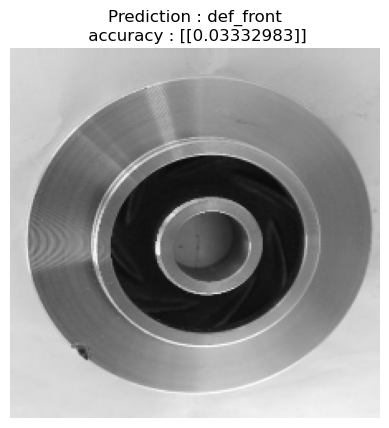

In [88]:
pred_and_plot(model_3_f,"cast_def_0_9854.jpeg")